# Import Data into Pandas DataFrame 

In [2]:
# add matplotlib inline magic command
%matplotlib inline
# dependencies and setup 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv 


In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"


In [4]:
# read the city data file and store it in a pandas dataframe
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# read the ride data file and store it as a pandas data frame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


# Inspect Data in DataFrames

## City Data

checking for nulls

In [6]:
# get columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# double check there arent any nulls
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

checking data types

In [8]:
# check the data type on the columns we will use for calculations
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# check number of data points 
city_data_df.sum()

city            RichardfortWilliamsstadPort AngelaRodneyfortWe...
driver_count                                                 2973
type            UrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanUrbanU...
dtype: object

Get the types of cities

In [10]:
# get unique values of the type of city
city_data_df['type'].unique()


array(['Urban', 'Suburban', 'Rural'], dtype=object)

number of rides in urban cities

In [11]:
# get the numbder of data points for the urban cities
# make sure teh string you are looking for matches exactly, check your capitalization
sum(city_data_df['type']=='Urban')

66

number of rides in rural cities

In [12]:
# get number of rural data points
sum(city_data_df['type']=='Rural')

18

number of rides in suburban cities

In [13]:
# get number of suburban
sum(city_data_df['type']=='Suburban')

36

## Ride Data

checking for those nulls

In [14]:
# get the columns and rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
# double check it
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

get data types

In [16]:
# check the data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

# Merge DataFrames

* merging the 2 dataframes requires a common column, in this case 'city' is the column shared by both sets. 
* syntax follows this: new_df = pd.merge(leftdf, rightdf, on=["column_leftdf", "column_rightdf"])
* 'how=' parameter sometimes is used, either left right inner or outer, default is inner

In [17]:
# combine dataframes into single one
pyber_data_df = pd.merge(ride_data_df,city_data_df, how='left', on=['city','city'])

# print the new dataframe
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


# Create a Bubble Chart that Showcases Average Fare vs. Total Number of Rides with bubble size showing total number of drivers per city type (Urban, Suburban, Rural)

Create Dataframes for each Type of City 5.3.1

In [18]:
# create the urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df['type']=='Urban']
urban_cities_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [19]:
# create the suburban city DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
suburban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
1630,East Marymouth,2019-03-29 08:36:20,37.60,6370863861570,5,Suburban
1631,New Raymond,2019-02-25 21:40:18,20.44,5984505117874,17,Suburban
1632,Lake Robertside,2019-01-11 20:17:36,46.51,6574333011308,4,Suburban
1633,Josephside,2019-03-30 09:45:11,44.74,5592692102803,25,Suburban
1634,Brandonfort,2019-01-14 12:35:27,28.02,8100258078935,10,Suburban


In [20]:
# create the rural city DataFrame
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']
rural_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
2255,Taylorhaven,2019-04-06 01:01:29,45.31,2275364435623,1,Rural
2256,Garzaport,2019-02-18 18:27:48,36.16,2928337561347,7,Rural
2257,New Ryantown,2019-01-27 17:33:41,42.68,7994603753131,2,Rural
2258,Lake Latoyabury,2019-04-02 21:00:22,13.46,8232864757802,2,Rural
2259,North Holly,2019-02-16 17:02:51,39.46,4571476032148,8,Rural


Number of Riders per City type 5.3.2

In [21]:
# group by city with count of rides per city, then select the ride_id column to show number of rides per urban city 
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head(10)

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
East Kaylahaven    29
Erikaland          12
Grahamburgh        25
Huntermouth        24
Hurleymouth        28
Name: ride_id, dtype: int64

In [22]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]



 Average Fare per city per City Type 5.3.3

In [23]:
# get average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head(10)

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
East Kaylahaven    23.757931
Erikaland          24.906667
Grahamburgh        25.221200
Huntermouth        28.993750
Hurleymouth        25.891429
Name: fare, dtype: float64

In [24]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

Average number of drivers for each city type 5.3.4

In [25]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [26]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

## Bubble Charts 5.3.5

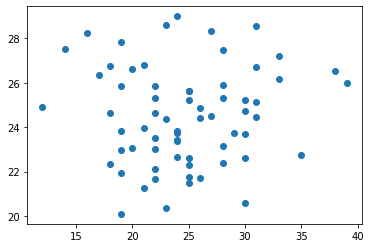

In [27]:
# using MATLAB method, build scatter plot for urban cities
plt.scatter(urban_ride_count, urban_avg_fare)

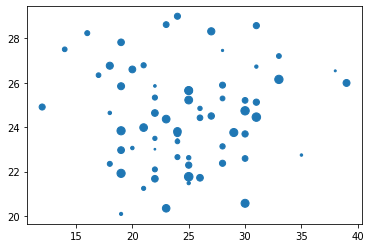

In [28]:
# Build the scatter plots for urban cities with bubble size showing number of drivers
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=urban_driver_count)

### Urban Bubble Chart

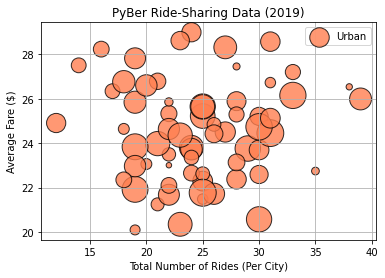

In [29]:
# Build the scatter plots for urban cities with x axis showing ride count, y axis avg fare, bubble size driver count.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

### Suburban Bubble Chart

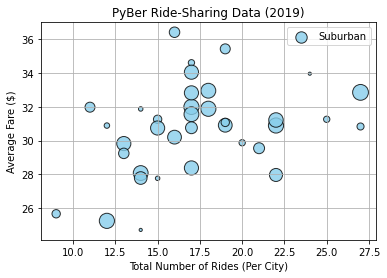

In [30]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

### Rural Bubble Chart

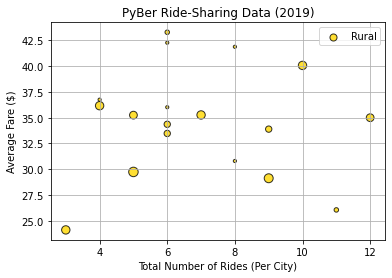

In [31]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

### All city types bubble chart

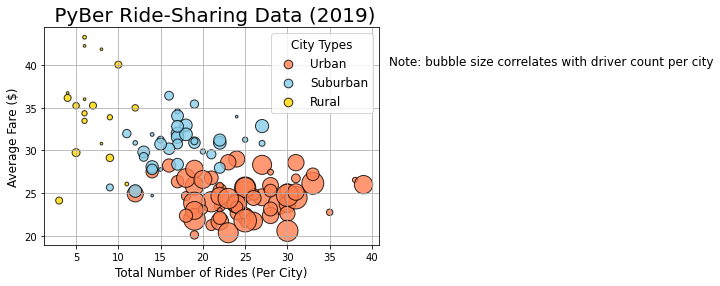

In [39]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=7*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=7*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=7*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# adding graph properties, grid, labels, title
plt.title(' PyBer Ride-Sharing Data (2019)',fontsize=20)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.grid(True)

# Legend and related parameters
legend = plt.legend(fontsize='12', mode='expanded',scatterpoints=1, loc='best', title='City Types')
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]
legend.get_title().set_fontsize(12)

# text label for bubble size
plt.text(42,40, "Note: bubble size correlates with driver count per city", fontsize=12)

# save figure 
plt.savefig('Analysis/Fig1.png')

# Show the plot
plt.show()